In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# load irist dataset
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# extract all the data into a 2D array for further processing
X = df.values
print("X shape:", X.shape)

X shape: (150, 4)


In [3]:
# PCA requires scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)
print("Xscaled shape:", Xscaled.shape)

Xscaled shape: (150, 4)


In [4]:
# Do PCA for 4 features
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state=42)
pca.fit(Xscaled)
Xpca = pca.transform(Xscaled)
print("Xpca shape:", Xpca.shape)

Xpca shape: (150, 4)


### How much variance is explained by each of these top two PCA features

In [5]:
# Analyze how much each transformed feature explains the variability of the data
xvr = pca.explained_variance_ratio_
print("PCA variance ratios:")
for ix, v in enumerate(xvr):
    print("  ", ix, ":", v)

PCA variance ratios:
   0 : 0.7296244541329985
   1 : 0.22850761786701787
   2 : 0.036689218892828765
   3 : 0.005178709107154801


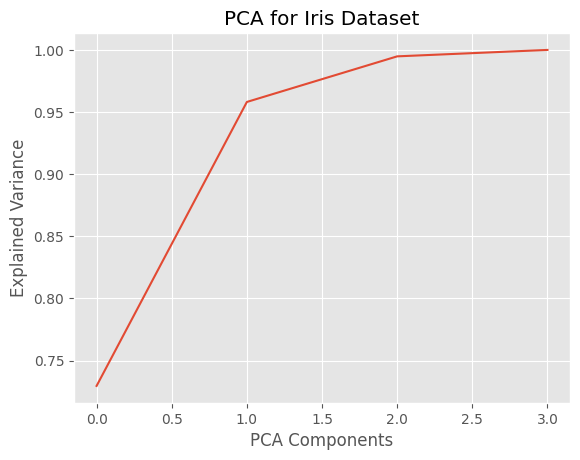

In [6]:
# Use the cumulative sum to see how much of the data's variance (in total) is
# explained as we add more PCA features
csum = np.cumsum(xvr)
plt.plot(csum)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance")
plt.title("PCA for Iris Dataset")
plt.show()

<AxesSubplot: >

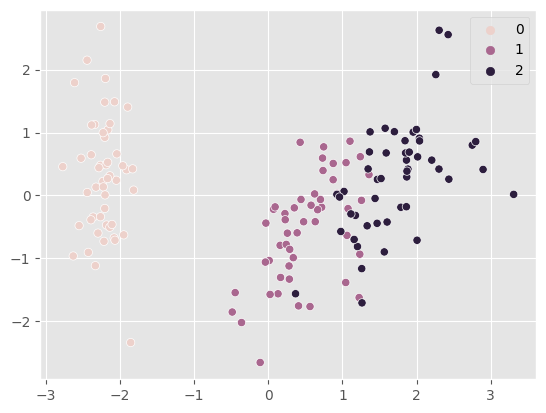

In [7]:
# Finally, plot the top two PCA features, properly color-coded
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1], hue=iris.target)